# Support Vector Machines

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

In [226]:
from IPython.display import Image
Image(url='svmgif.gif')   

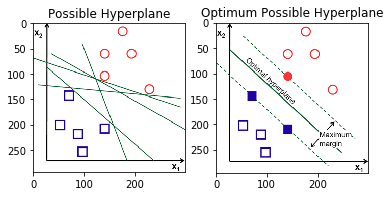

In [227]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread('svm1.png')
img2 = cv2.imread('svm2.png')
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Possible Hyperplane")

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Optimum Possible Hyperplane")

plt.show()

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

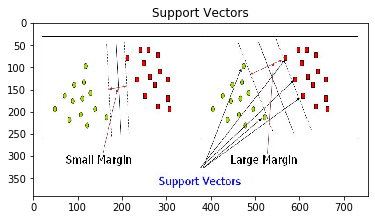

In [228]:
img1 = cv2.imread('svm5.jpg')
plt.imshow(img1)
plt.title("Support Vectors")
plt.show()

COST FUNCTION:
In the SVM algorithm, we are looking to maximize the margin between the data points and the hyperplane. The loss function that helps maximize the margin is hinge loss.

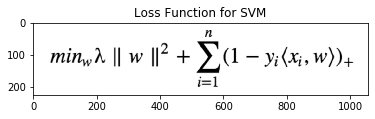

In [229]:
img1 = cv2.imread('svm6.png')
plt.imshow(img1)
plt.title("Loss Function for SVM")
plt.show()

## Import Libraries


In [231]:
import numpy as np
import pickle
import cv2
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from numpy import array 
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

## Unpickle Data

In [232]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

## Process Data

In [233]:
def data_processing(batch_num):
    filename= './Datasets/Question-1/cifar-10-python/cifar-10-batches-py/{}'.format(batch_num)
    batch= unpickle(filename)
    batch[b'data'].reshape((len(batch[b'data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    return np.asarray(batch[b'labels']), batch[b'data']

## Data Visualization 

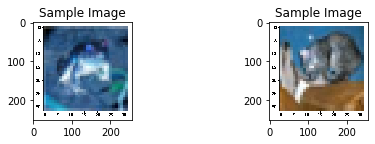

In [234]:
img1 = cv2.imread('svm7.png')
img2 = cv2.imread('svm8.png')
plt.subplot(1, 3, 1)
# plt.figsize(10,10)
plt.imshow(img1)
plt.title("Sample Image")

plt.subplot(1, 3, 3)
plt.imshow(img2)
plt.title("Sample Image")

plt.show()

## Split dataset into Train & Validation data

In [235]:
def split_data(dataset):
    length= int(0.2*len(dataset))
    train_data = dataset[length:]
    valid_data = dataset[:length]

    return train_data, valid_data

## Normalize Data

In [236]:
def normalize(dfObj):
    dfObj= pd.DataFrame(dfObj)
    minValuesObj = (dfObj.min()).tolist()
    
    maxValuesObj = (dfObj.max()).tolist()
    
    dfObj= dfObj.to_numpy()

    for i in range (dfObj.shape[1]):
        for j in range (dfObj.shape[0]):
            dfObj[j][i]= (dfObj[j][i]- (minValuesObj[i]))/(maxValuesObj[i]-minValuesObj[i])
    
#     dfObj= pd.DataFrame(dfObj)
    return dfObj

## Apply PCA

In [237]:
def apply_pca(data):
    pca = PCA(n_components=50)
    data = pca.fit_transform(data)
    return data

## Load all the Batch Files

In [238]:
# final_labels= []
for i in range (0,5):
    batch_num= 'data_batch_{}'.format(str(i+1))
    labels, data= data_processing(batch_num)
    if(i== 0):
        final_labels= labels
        dataset= data
    else:
        final_labels= np.hstack((final_labels, labels))
        dataset= np.vstack((dataset, data))

dataset= normalize(dataset)
dataset= apply_pca(dataset)
train_data, valid_data= split_data(dataset)
length= int(0.2*len(dataset))

train_labels= final_labels[length:]

valid_labels= final_labels[:length]

In [239]:
C_map= []
accuracy_map= []


# C= 2


## Fit the data in SVM_Classifier

In [258]:
classifier= svm.SVC(kernel= 'linear', C= 2, decision_function_shape='ovr')
classifier.fit(train_data, train_labels)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Predict the Labels on Validation Data 

In [259]:
predict_labels= classifier.predict(valid_data)

## Calculate Accuracy of the Model

In [260]:
accuracy = accuracy_score(valid_labels, predict_labels)
print('Model accuracy is: ', accuracy*100)
C_map.append(2)
accuracy_map.append(accuracy)

Model accuracy is:  38.3582


## Calculate F1-score

In [261]:
print ('F1 score:')
print ()
print (f1_score(predict_labels, valid_labels, average=None))

F1 score:

[0.03539823 0.06392694 0.04142012 0.05381166 0.01694915 0.
 0.20700986 0.07964602 0.041841   0.24      ]


## Classification Report

In [262]:
print ('Clasification report:') 
print ()
print (classification_report(predict_labels, valid_labels))

Clasification report:

              precision    recall  f1-score   support

           0       0.02      0.17      0.04        24
           1       0.04      0.25      0.06        28
           2       0.03      0.05      0.04       135
           3       0.03      0.21      0.05        28
           4       0.01      0.09      0.02        22
           5       0.00      0.00      0.00         9
           6       0.91      0.12      0.21      1619
           7       0.05      0.33      0.08        27
           8       0.02      0.14      0.04        36
           9       0.16      0.46      0.24        72

    accuracy                           0.13      2000
   macro avg       0.13      0.18      0.08      2000
weighted avg       0.75      0.13      0.18      2000



## Confusion Matrix

In [263]:
print ('Confussion matrix:')
print ()
print (confusion_matrix(predict_labels, valid_labels))

Confussion matrix:

[[  4   4   5   1   0   1   2   2   2   3]
 [  5   7   0   2   1   1   3   0   1   8]
 [ 17  22   7  15   2  18   4  20  11  19]
 [  3   6   1   6   2   1   2   0   2   5]
 [  1   1   3   3   2   3   0   3   2   4]
 [  1   1   0   1   2   0   0   2   0   2]
 [166 140 183 159 201 155 189 149 169 108]
 [  0   2   1   0   2   2   1   9   5   5]
 [  3   3   1   1   0   2   1   4   5  16]
 [  2   5   2   7   2   0   5  10   6  33]]


# C=5

## Fit the data in SVM_Classifier

In [264]:
classifier= svm.SVC(kernel= 'linear', C= 5, decision_function_shape='ovr')
classifier.fit(train_data, train_labels)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Predict the Labels on Validation Data 

In [265]:
predict_labels= classifier.predict(valid_data)

## Calculate Accuracy of the Model

In [266]:
accuracy = accuracy_score(valid_labels, predict_labels)
print('Model accuracy is: ', accuracy*100)
C_map.append(5)
accuracy_map.append(accuracy)

Model accuracy is:  48.631


## Calculate F1-score

In [267]:
print ('F1 score:')
print ()
print (f1_score(predict_labels, valid_labels, average=None))

F1 score:

[0.05106383 0.07207207 0.05013928 0.04484305 0.00840336 0.
 0.20852018 0.069869   0.03333333 0.23913043]


## Classification Report

In [268]:
print ('Clasification report:') 
print ()
print (classification_report(predict_labels, valid_labels))

Clasification report:

              precision    recall  f1-score   support

           0       0.03      0.18      0.05        33
           1       0.04      0.26      0.07        31
           2       0.04      0.06      0.05       156
           3       0.03      0.18      0.04        28
           4       0.00      0.04      0.01        24
           5       0.00      0.00      0.00        11
           6       0.90      0.12      0.21      1577
           7       0.04      0.27      0.07        30
           8       0.02      0.11      0.03        37
           9       0.16      0.45      0.24        73

    accuracy                           0.13      2000
   macro avg       0.13      0.17      0.08      2000
weighted avg       0.72      0.13      0.18      2000



## Confusion Matrix

In [269]:
print ('Confussion matrix:')
print ()
print (confusion_matrix(predict_labels, valid_labels))

Confussion matrix:

[[  6   4   6   2   1   2   2   3   2   5]
 [  5   8   0   3   1   0   3   0   2   9]
 [ 20  26   9  11   4  23   8  21  18  16]
 [  3   8   1   5   1   2   1   2   1   4]
 [  1   1   2   3   1   3   0   4   4   5]
 [  0   0   2   2   2   0   1   1   1   2]
 [162 132 180 159 198 148 186 144 161 107]
 [  0   3   0   3   3   2   1   8   4   6]
 [  3   2   1   1   1   2   0   7   4  16]
 [  2   7   2   6   2   1   5   9   6  33]]


## Comparision

C vs Accuracy



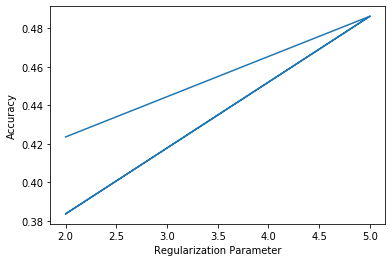

In [270]:
print ('C vs Accuracy')
print()
plt.plot(C_map, accuracy_map)
plt.xlabel('Regularization Parameter')
plt.ylabel('Accuracy')
plt.show()